## reduction of data set by the size of lot and living

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [23]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
import statsmodels.api as sm

In [43]:


class OLSregModelWrapper():
    def __init__(self, df, lst_x, label='none', const_en = False,yn='price', test_s = 0.2):
        self.RegModel = None
        self.y_hat = None
        self.testMSE = None
        self.testMSE_relativ = None
        self.lst_x = lst_x
        self.label = label
        
        # prep
        y=df[yn]
        X=df[lst_x]#.drop(yn,axis=1)
        if const_en:
            X = sm.add_constant(X)
        
        
        self.x_train,self.x_test,self.y_train,self.y_test= \
            train_test_split(X,y,test_size=test_s,random_state=105)
        
        # Train and Test
        self.Train()
        self.Test()
        
        
        
    def Train(self):
        self.RegModel = sm.OLS(self.y_train ,self.x_train).fit()
        
    
    def Test(self):
        self.y_hat = self.RegModel.predict(self.x_test)
        
        self.testMSE = metrics.mean_squared_error(y_true = self.y_test, y_pred = self.y_hat)
        self.testRMSE = np.sqrt(self.testMSE)
        self.testRMSE_relativ = self.testRMSE/(self.y_test.mean())
        self.testMAE =  metrics.mean_absolute_error(self.y_test, self.y_hat)
        self.testR2 = metrics.r2_score(self.y_test, self.y_hat)
        
    
    def PlotTest(self,a=1.0):
        plt.plot(self.y_hat-self.y_test,'o',label=self.label, alpha=a) 
        pass
    
    def PlotTestDist(self, b=50):
        sns.distplot((self.y_hat-self.y_test),bins=b);
    
    def PlotRes(self,a=1.0):
        plt.plot(self.RegModel.resid,'o',label=self.label, alpha=a)
        pass
        
    
    def predict(self, df):
        if const_en:
            X = sm.add_constant(df[self.lst_x])
        else:
            X = df[self.lst_x]
        return self.RegModel.predict(X)
        
    
    


In [32]:
df_raw = pd.read_csv('King_County_House_prices_dataset.csv')
df_raw.columns
#j ='price'
#df_raw[j]

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [48]:
# Size limitation of focus ( and trans. qm^2)
df_raw['qm_living'] = df_raw.sqft_living*0.092903
df_raw['qm_lot'] = df_raw.sqft_lot*0.092903


df_avrsized_liv = df_raw[df_raw.qm_lot < df_raw.qm_lot.mean() + df_raw.qm_lot.std()]
df_avrsized_livlot = df_avrsized_liv[df_avrsized_liv.qm_living < df_avrsized_liv.qm_living.mean() + df_avrsized_liv.qm_living.std()]
df_avrsized_livlot = df_avrsized_livlot[df_avrsized_livlot.qm_lot< 1500]

0.42901727885896984
0.3272827298655367
229023.76881948952
146783.53787935397
0.564233426275309
0.470133978122107
0.8624662200116358
0.9080889986055218


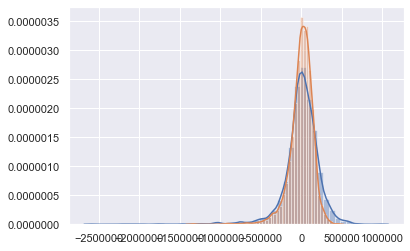

In [49]:
l = ['sqft_living', 'sqft_lot', \
     'yr_built','lat' ,'long']

Model_base = OLSregModelWrapper(df_raw,l,'base',False)

Model_O1 = OLSregModelWrapper(df_avrsized_livlot,l,'aversized',False)

print(Model_base.testRMSE_relativ)
print(Model_O1.testRMSE_relativ)
print(Model_base.testRMSE)
print(Model_O1.testRMSE)
print(Model_base.testR2)
print(Model_O1.testR2)
print(Model_base.RegModel.rsquared)
print(Model_O1.RegModel.rsquared)

Model_base.PlotTestDist()
Model_O1.PlotTestDist()

## reduction in RMSE 